In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import math

data_path = 'data'
output_path = 'output/'
temp_path = 'tmp/'

In [2]:
# Load the test data
test_df_orig = pd.read_parquet(f'{data_path}/test_data.parquet')
test_pred_cols = list(
    filter(
        lambda x: x.startswith("call") or x.startswith("put"), test_df_orig.columns.tolist()
    )
)
# output_matching = pd.read_csv(f"final_day/matching/ouptut0.csv", header=None)
# output_matching.columns = test_pred_cols
test_df = test_df_orig.copy()
# test_df[test_pred_cols] = output_matching
print(test_df.shape)
print(list(test_df.columns))
test_df.head()

(12065, 96)
['timestamp', 'underlying', 'call_iv_24000', 'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'call_iv_26100', 'call_iv_26200', 'call_iv_26300', 'call_iv_26400', 'call_iv_26500', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000', 'put_iv_25100', 'put_iv_25200', 'put_iv_25300', 'put_iv_25400', 'put_iv_25500', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 

,timestamp,underlying,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,0,24735.9,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,...,0.006587,0.002826,-1.737617e+05,-0.009541,-0.017831,0.000264,2.032521e+06,1.000000e-06,-0.077238,-5.362742e+06
1,1,24766.7,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,...,0.005777,0.004588,-3.195086e+05,-0.024106,-0.004696,-0.000158,-4.529075e+06,-1.619022e+06,-0.956928,4.624907e+06
2,2,24896.9,NaN,0.251731,NaN,NaN,0.214869,0.20458,0.194604,NaN,...,0.000829,-0.034944,1.027525e+06,0.028201,0.032234,0.007687,2.663908e+06,0.000000e+00,-0.116264,-2.669766e+06
3,3,24898.1,0.241888,NaN,0.220505,NaN,0.198602,0.18619,NaN,NaN,...,-0.009323,-0.022969,-4.720074e+06,-0.001513,0.008704,-0.000206,-7.672936e+06,-1.903406e+06,-2.249208,-1.858254e+07
4,4,24906.5,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,...,-0.018674,-0.007588,-4.051681e+05,-0.136267,0.002425,-0.002200,1.334469e+06,2.548789e+05,1.999104,3.024212e+06


In [3]:
test_df.isna().sum().sum()

376504

In [4]:
test_df.to_csv("final_day/matching/output_full.csv", index=False)

In [5]:
# Find rows in test_df that contain NaN values
nan_rows = test_df[test_df.isna().any(axis=1)]
print(f"Number of rows with NaN values: {len(nan_rows)}")
print(f"Percentage of rows with NaN: {len(nan_rows) / len(test_df) * 100:.2f}%")

# Show the first few rows with NaN values
print("\nFirst 5 rows with NaN values:")
nan_rows[test_pred_cols[0:20]]

Number of rows with NaN values: 12065
Percentage of rows with NaN: 100.00%

First 5 rows with NaN values:


,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,call_iv_24900,call_iv_25000,call_iv_25100,call_iv_25200,call_iv_25300,call_iv_25400,call_iv_25500,call_iv_25600,call_iv_25700,call_iv_25800,call_iv_25900
0,0.280939,NaN,NaN,NaN,0.242149,NaN,0.232439,NaN,0.222997,0.227966,NaN,0.245304,0.254209,NaN,NaN,0.284455,NaN,NaN,NaN,NaN
1,0.270276,NaN,0.258893,NaN,NaN,NaN,0.233548,NaN,NaN,0.229917,NaN,NaN,0.257819,NaN,NaN,0.284057,NaN,NaN,NaN,NaN
2,NaN,0.251731,NaN,NaN,0.214869,0.204580,0.194604,NaN,NaN,0.180668,0.181345,0.185130,NaN,0.197133,NaN,NaN,NaN,NaN,0.243069,NaN
3,0.241888,NaN,0.220505,NaN,0.198602,0.186190,NaN,NaN,NaN,NaN,NaN,NaN,0.181429,NaN,NaN,0.210327,NaN,0.230049,NaN,NaN
4,0.235328,NaN,0.222983,0.214126,NaN,NaN,0.192603,NaN,NaN,NaN,NaN,0.176155,0.177836,0.178878,0.182727,0.188761,0.193893,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,NaN,0.233427,NaN,NaN,NaN,NaN,NaN,0.186856,NaN,0.178101,0.175260,0.174428,0.175498,0.176860,NaN,NaN,NaN,NaN,0.198679,NaN
12061,NaN,0.236380,0.226972,NaN,NaN,0.200906,0.193655,NaN,NaN,NaN,0.177978,NaN,NaN,NaN,NaN,0.185826,NaN,0.193188,NaN,0.202897
12062,0.256475,0.243817,0.234267,0.221270,NaN,NaN,NaN,0.185088,0.179760,0.177229,NaN,0.181795,NaN,NaN,NaN,0.211952,0.220102,NaN,0.240654,NaN
12063,NaN,0.239825,NaN,NaN,NaN,NaN,NaN,0.190833,0.185851,0.181560,0.178590,0.177669,0.177898,0.178252,NaN,0.183133,0.186324,NaN,NaN,NaN


In [6]:
test_df.fillna(0.205, inplace=True)

In [7]:
test_df.isna().sum().sum()

0

In [8]:
data_path = "data"
output_path = "output/"
temp_path = "tmp/"

sample_submission = pd.read_csv(f"{data_path}/sample_submission.csv")
submission_cols = sample_submission.columns.tolist()

In [9]:
sub = test_df[submission_cols]
sub.to_csv(f"output/0.002.csv", index=False)
sub

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.205000,0.205000,0.205000,0.242149,0.205000,0.232439,0.205000,0.222997,...,0.232334,0.205000,0.205000,0.227301,0.234169,0.205000,0.250422,0.205000,0.205000,0.282229
1,1,0.270276,0.205000,0.258893,0.205000,0.205000,0.205000,0.233548,0.205000,0.205000,...,0.205000,0.228209,0.205000,0.205000,0.205000,0.249402,0.205000,0.205000,0.205000,0.205000
2,2,0.205000,0.251731,0.205000,0.205000,0.214869,0.204580,0.194604,0.205000,0.205000,...,0.194612,0.188052,0.205000,0.205000,0.181346,0.205000,0.190750,0.205000,0.205000,0.205000
3,3,0.241888,0.205000,0.220505,0.205000,0.198602,0.186190,0.205000,0.205000,0.205000,...,0.205000,0.166394,0.161561,0.205000,0.205000,0.172032,0.205000,0.205000,0.205000,0.206107
4,4,0.235328,0.205000,0.222983,0.214126,0.205000,0.205000,0.192603,0.205000,0.205000,...,0.205000,0.205000,0.205000,0.177920,0.205000,0.176000,0.205000,0.205000,0.182314,0.205000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,0.205000,0.233427,0.205000,0.205000,0.205000,0.205000,0.205000,0.186856,0.205000,...,0.205000,0.205000,0.205000,0.177270,0.205000,0.205000,0.176356,0.177716,0.205000,0.205000
12061,12061,0.205000,0.236380,0.226972,0.205000,0.205000,0.200906,0.193655,0.205000,0.205000,...,0.205000,0.205000,0.205000,0.180196,0.177969,0.177923,0.205000,0.180254,0.205000,0.205000
12062,12062,0.256475,0.243817,0.234267,0.221270,0.205000,0.205000,0.205000,0.185088,0.179760,...,0.192306,0.205000,0.179666,0.176916,0.205000,0.205000,0.205000,0.205000,0.201360,0.209940
12063,12063,0.205000,0.239825,0.205000,0.205000,0.205000,0.205000,0.205000,0.190833,0.185851,...,0.205000,0.190933,0.186172,0.205000,0.205000,0.205000,0.205000,0.178806,0.205000,0.205000


In [10]:
# Load the training data
# train_df = pd.read_parquet(f"{data_path}/train_data.parquet")
train_df  = pd.read_csv(f"{temp_path}/filtered_data.csv", low_memory=False)
print(train_df.shape)
print(list(train_df.columns))
train_df.head()

(178340, 97)
['timestamp', 'underlying', 'expiry', 'call_iv_23500', 'call_iv_23600', 'call_iv_23700', 'call_iv_23800', 'call_iv_23900', 'call_iv_24000', 'call_iv_24100', 'call_iv_24200', 'call_iv_24300', 'call_iv_24400', 'call_iv_24500', 'call_iv_24600', 'call_iv_24700', 'call_iv_24800', 'call_iv_24900', 'call_iv_25000', 'call_iv_25100', 'call_iv_25200', 'call_iv_25300', 'call_iv_25400', 'call_iv_25500', 'call_iv_25600', 'call_iv_25700', 'call_iv_25800', 'call_iv_25900', 'call_iv_26000', 'put_iv_22500', 'put_iv_22600', 'put_iv_22700', 'put_iv_22800', 'put_iv_22900', 'put_iv_23000', 'put_iv_23100', 'put_iv_23200', 'put_iv_23300', 'put_iv_23400', 'put_iv_23500', 'put_iv_23600', 'put_iv_23700', 'put_iv_23800', 'put_iv_23900', 'put_iv_24000', 'put_iv_24100', 'put_iv_24200', 'put_iv_24300', 'put_iv_24400', 'put_iv_24500', 'put_iv_24600', 'put_iv_24700', 'put_iv_24800', 'put_iv_24900', 'put_iv_25000', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X1

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,0.237872,0.213056,0.191247,0.173081,0.157550,0.146430,0.140084,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,0.236015,0.213177,0.189552,0.169672,0.153648,0.141522,0.134405,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,0.225757,0.199469,0.178547,0.156187,0.140276,0.130288,0.124253,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.220805,0.195398,0.176247,0.155271,0.139753,0.129641,0.123994,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.220088,0.195815,0.177803,0.156409,0.141458,0.130448,0.124707,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063


In [11]:
nan_counts = test_df.isna().sum()
print(list(nan_counts))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
# count the number of values in each group after grouping by expiry in train_df
expiry_counts = train_df.groupby('expiry').size()
expiry_counts

expiry
2025-04-24    19959
2025-04-30    79204
2025-05-08    79177
dtype: int64

In [13]:
train_df.describe()

,timestamp,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
count,1.783400e+05,178340.000000,178339.000000,178310.000000,178339.000000,178328.000000,178325.000000,178337.000000,178340.000000,178340.000000,...,178340.000000,178340.000000,1.783400e+05,178340.000000,178340.000000,178340.000000,1.783400e+05,1.783400e+05,1.783400e+05,1.783400e+05
mean,1.746052e+18,24323.883938,0.418795,0.374142,0.344563,0.298307,0.261092,0.231415,0.195213,0.160997,...,0.000277,0.000014,-1.421471e+04,0.000588,-0.093444,0.000832,-1.877999e+04,-1.383081e+05,-4.700416e+03,-3.956062e+02
std,3.824884e+14,129.485600,0.288149,0.231490,0.208711,0.151067,0.110361,0.089600,0.056097,0.032196,...,0.016701,0.008653,2.262233e+06,0.039787,2.346862,0.085648,4.314987e+06,1.873729e+07,7.563046e+05,1.225248e+06
min,1.745296e+18,23865.200000,0.186658,0.024363,0.036630,0.014043,0.030329,0.006816,0.123994,0.074081,...,-0.275930,-0.144559,-1.019237e+08,-0.625017,-16.815711,-2.586113,-2.726196e+08,-4.113054e+08,-8.211573e+07,-3.067265e+08
25%,1.745818e+18,24280.600000,0.256790,0.241743,0.226604,0.210745,0.192554,0.173014,0.161050,0.143029,...,-0.007785,-0.004317,-6.453953e+05,-0.018780,-1.098059,-0.022254,-7.875973e+05,-5.170499e+06,-1.279849e+05,-0.000000e+00
50%,1.745995e+18,24347.000000,0.297625,0.277056,0.256366,0.235445,0.216572,0.196701,0.174057,0.157880,...,0.000258,0.000012,0.000000e+00,0.000566,-0.006216,0.000048,4.336592e+03,-2.000000e-06,0.000000e+00,0.000000e+00
75%,1.746432e+18,24385.200000,0.404713,0.375352,0.346048,0.315594,0.281387,0.246242,0.210348,0.168074,...,0.008461,0.004381,6.062090e+05,0.020147,0.965078,0.023691,8.029313e+05,5.008932e+06,1.150824e+05,0.000000e+00
max,1.746610e+18,24668.500000,2.066750,1.868640,1.632810,1.340190,1.036610,0.829996,0.633309,0.445672,...,0.402689,0.191822,4.357080e+07,0.841955,22.124694,2.564958,2.498199e+08,6.597803e+08,2.846932e+07,1.981789e+08


In [14]:
train_df.groupby('expiry').mean()

,timestamp,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
expiry,,,,,,,,,,,,,,,,,,,,,
2025-04-24,1.745476e+18,24259.208788,0.883837,0.717643,0.675540,0.502613,0.423521,0.351933,0.248706,0.141685,...,0.000059,-0.000101,-3995.063678,0.000301,0.005822,0.000027,89347.241240,-176290.740979,-1239.233355,132.941159
2025-04-30,1.745823e+18,24256.224585,0.430785,0.390396,0.352749,0.311125,0.267587,0.239975,0.204723,0.174583,...,0.000175,-0.000008,-15635.454077,0.000645,-0.115680,-0.000005,33215.514330,11320.339727,-9126.805055,-1558.143679
2025-05-08,1.746428e+18,24407.869726,0.289574,0.271390,0.252941,0.234010,0.213676,0.192472,0.172215,0.152275,...,0.000432,0.000066,-15369.657733,0.000604,-0.096222,0.001873,-98050.014803,-278412.965510,-1145.015223,634.091163


In [15]:
train_df.groupby("expiry").median()

,timestamp,underlying,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,call_iv_24200,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
expiry,,,,,,,,,,,,,,,,,,,,,
2025-04-24,1.745477e+18,24253.6,0.788175,0.678013,0.601363,0.470214,0.398855,0.327337,0.233519,0.137120,...,0.000039,-0.000100,-1062.830691,0.000198,0.010347,-0.000037,60589.759611,-99719.910604,-639.625968,-0.0
2025-04-30,1.745866e+18,24329.5,0.317794,0.294924,0.273589,0.249538,0.225358,0.199885,0.173723,0.161769,...,0.000220,0.000043,0.000000,0.000687,-0.006869,0.000000,37338.498048,30432.667161,0.000000,0.0
2025-05-08,1.746504e+18,24390.9,0.272996,0.254970,0.236180,0.217581,0.198329,0.177834,0.164940,0.154567,...,0.000442,0.000059,0.000000,0.000726,-0.026104,0.000307,-41895.941126,-4618.706596,-0.000000,-0.0


In [16]:
type(train_df['expiry'][0])

str

In [17]:
# the below code is wrong and returns 0 entries. fix the code to get the correct entries for each expiry date
week1_df = train_df[train_df["expiry"] == "2025-04-24"]
week2_df = train_df[train_df["expiry"] == "2025-04-30"]
week3_df = train_df[train_df["expiry"] == "2025-05-08"]

print(week1_df.shape)
print(week2_df.shape)
print(week3_df.shape)


(19959, 97)
(79204, 97)
(79177, 97)


In [18]:
train_extra_cols = [col for col in train_df.columns if col not in test_df.columns]
train_extra_cols

['expiry',
 'call_iv_23500',
 'call_iv_23600',
 'call_iv_23700',
 'call_iv_23800',
 'call_iv_23900',
 'put_iv_22500',
 'put_iv_22600',
 'put_iv_22700',
 'put_iv_22800',
 'put_iv_22900']

In [19]:
test_extra_cols = [col for col in test_df.columns if col not in train_df.columns]
test_extra_cols

['call_iv_26100',
 'call_iv_26200',
 'call_iv_26300',
 'call_iv_26400',
 'call_iv_26500',
 'put_iv_25100',
 'put_iv_25200',
 'put_iv_25300',
 'put_iv_25400',
 'put_iv_25500']

In [20]:
test_df[test_extra_cols].isna().sum()

call_iv_26100    0
call_iv_26200    0
call_iv_26300    0
call_iv_26400    0
call_iv_26500    0
put_iv_25100     0
put_iv_25200     0
put_iv_25300     0
put_iv_25400     0
put_iv_25500     0
dtype: int64

In [21]:
call_put_cols = list(
    filter(
        lambda x: x.startswith("call") or x.startswith("put"), train_df.columns.tolist()
    )
)
len(call_put_cols)

52

In [22]:
rem_cols = [col for col in train_df.columns if col not in call_put_cols]
rem_cols

['timestamp',
 'underlying',
 'expiry',
 'X0',
 'X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37',
 'X38',
 'X39',
 'X40',
 'X41']

In [23]:
train_df[rem_cols]

,timestamp,underlying,expiry,X0,X1,X2,X3,X4,X5,X6,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,1745296089000000000,24160.9,2025-04-24,-0.092103,-0.084458,1.025842e+05,0.001655,-1.379624e+06,0.027959,-0.020240,...,0.013995,0.007922,-1.947502e+05,0.024715,0.530894,-0.002354,-3.224848e+05,-1.600795e+06,13063.446970,445511.363636
1,1745304077000000000,24188.1,2025-04-24,-0.013699,-0.023263,1.086423e+05,-0.004734,2.528508e+06,-0.006439,-0.011416,...,-0.004976,-0.009555,-1.481909e+06,-0.004020,-1.429919,-0.000843,1.658073e+06,-1.742468e+06,31364.628427,-46123.161765
2,1745313495000000000,24148.6,2025-04-24,-0.395427,-0.056440,-1.194717e+06,0.005011,-1.185146e+08,-0.027625,-0.002189,...,-0.012869,-0.004012,-1.250688e+06,-0.035342,-0.523109,0.013778,-2.646675e+06,-5.051008e+07,-847564.971737,-225333.881579
3,1745313499000000000,24147.4,2025-04-24,0.007829,-0.086614,5.936540e+05,0.001347,3.826919e+06,-0.052881,-0.015226,...,-0.006014,0.004207,6.378700e+05,-0.045472,0.741664,0.002590,-1.607321e+06,4.170899e+05,333918.361928,-114960.453869
4,1745313608000000000,24155.9,2025-04-24,0.012404,-0.005619,2.419948e+05,-0.001172,4.596446e+06,0.039326,0.015934,...,0.020878,-0.001747,9.592702e+04,0.044814,-0.015472,0.012185,6.820360e+05,4.081106e+06,3309.895833,183946.289063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178335,1746610196000000000,24358.8,2025-05-08,-0.226467,-0.011456,0.000000e+00,0.001979,2.322461e+06,-0.000943,-0.006141,...,-0.011905,0.000325,-3.540254e+05,0.050895,-1.121442,0.023504,-1.878804e+05,2.530094e+06,-0.000000,0.000000
178336,1746610197000000000,24359.6,2025-05-08,-0.148357,0.062989,0.000000e+00,0.000580,3.229624e+06,0.067154,0.000647,...,0.028344,-0.002219,-2.081719e+05,0.011957,-1.066485,0.017385,1.055536e+06,1.794233e+06,-0.000000,0.000000
178337,1746610198000000000,24358.5,2025-05-08,-0.190833,-0.160079,0.000000e+00,0.001718,2.162806e+06,-0.119378,0.007482,...,-0.034540,0.006087,-2.078984e+05,-0.041227,-1.147740,0.111446,-5.074557e+05,-6.639723e+05,-0.000000,0.000000
178338,1746610199000000000,24358.5,2025-05-08,-0.615292,-0.194071,-2.446594e+05,0.000750,-3.295170e+06,-0.008974,-0.018477,...,-0.023918,-0.013291,-4.520567e+05,-0.035861,-1.680071,0.188765,8.729859e+05,-5.955741e+06,-244659.375000,0.000000


In [24]:
call_cols = [col for col in call_put_cols if col.startswith("call_iv_")]
len(call_cols)

26

## I Like the smile :)

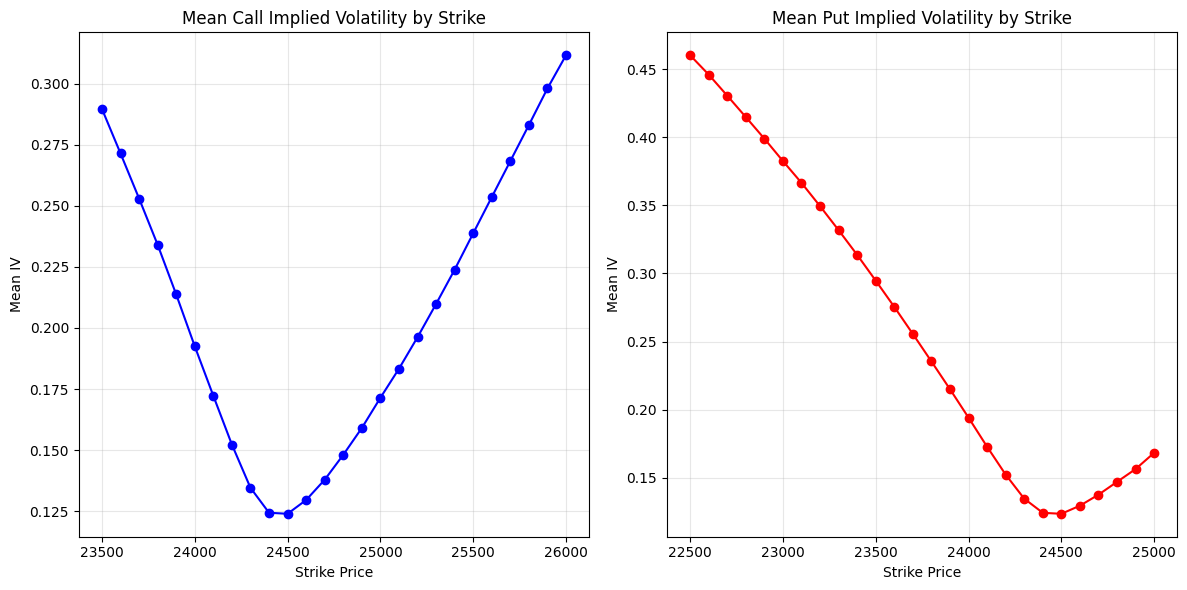

In [25]:
# Get only the call and put IV columns
call_cols = [col for col in call_put_cols if col.startswith('call_iv_')]
put_cols = [col for col in call_put_cols if col.startswith('put_iv_')]

# Extract strike prices from column names
call_strikes = [int(col.split('_')[-1]) for col in call_cols]
put_strikes = [int(col.split('_')[-1]) for col in put_cols]

# Calculate means
call_means = [week3_df[col].mean() for col in call_cols]
put_means = [week3_df[col].mean() for col in put_cols]

# Create figure with two subplots
plt.figure(figsize=(12, 6))

# Plot call IV curve
plt.subplot(1, 2, 1)
plt.plot(call_strikes[:], call_means[:], 'o-', color='blue')
plt.title('Mean Call Implied Volatility by Strike')
plt.xlabel('Strike Price')
plt.ylabel('Mean IV')
plt.grid(True, alpha=0.3)

# Plot put IV curve
plt.subplot(1, 2, 2)
plt.plot(put_strikes[:], put_means[:], 'o-', color='red')
plt.title('Mean Put Implied Volatility by Strike')
plt.xlabel('Strike Price')
plt.ylabel('Mean IV')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

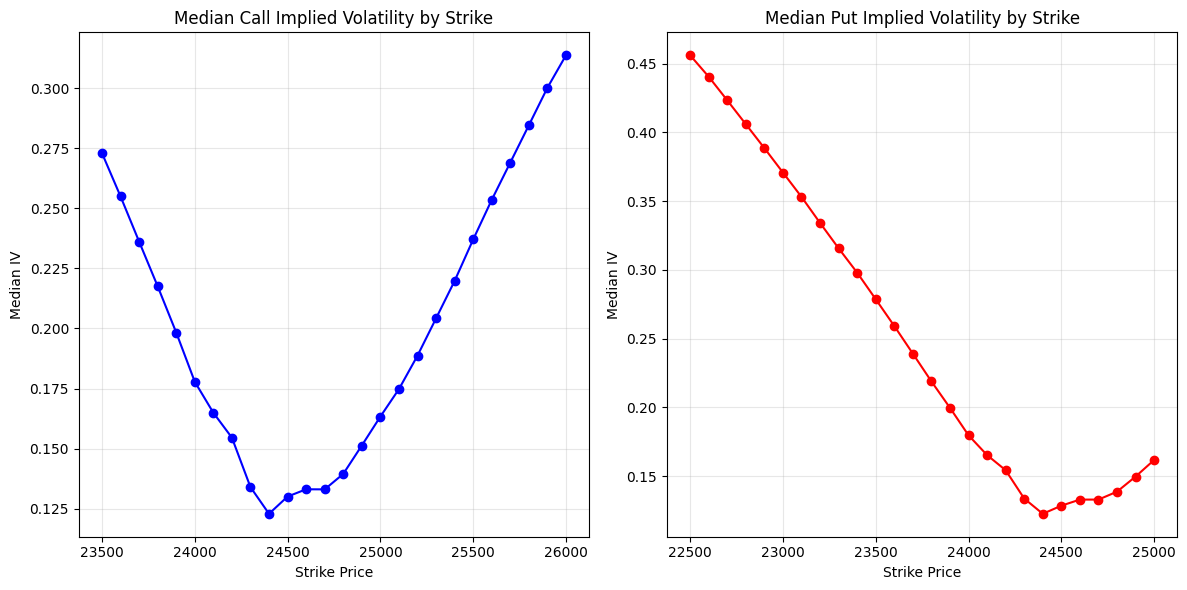

In [26]:
# Get only the call and put IV columns
call_cols = [col for col in call_put_cols if col.startswith('call_iv_')]
put_cols = [col for col in call_put_cols if col.startswith('put_iv_')]

# Extract strike prices from column names
call_strikes = [int(col.split('_')[-1]) for col in call_cols]
put_strikes = [int(col.split('_')[-1]) for col in put_cols]

# Calculate medians
call_medians = [week3_df[col].median() for col in call_cols]
put_medians = [week3_df[col].median() for col in put_cols]

# Create figure with two subplots
plt.figure(figsize=(12, 6))

# Plot call IV curve
plt.subplot(1, 2, 1)
plt.plot(call_strikes, call_medians, 'o-', color='blue')
plt.title('Median Call Implied Volatility by Strike')
plt.xlabel('Strike Price')
plt.ylabel('Median IV')
plt.grid(True, alpha=0.3)

# Plot put IV curve
plt.subplot(1, 2, 2)
plt.plot(put_strikes, put_medians, 'o-', color='red')
plt.title('Median Put Implied Volatility by Strike')
plt.xlabel('Strike Price')
plt.ylabel('Median IV')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

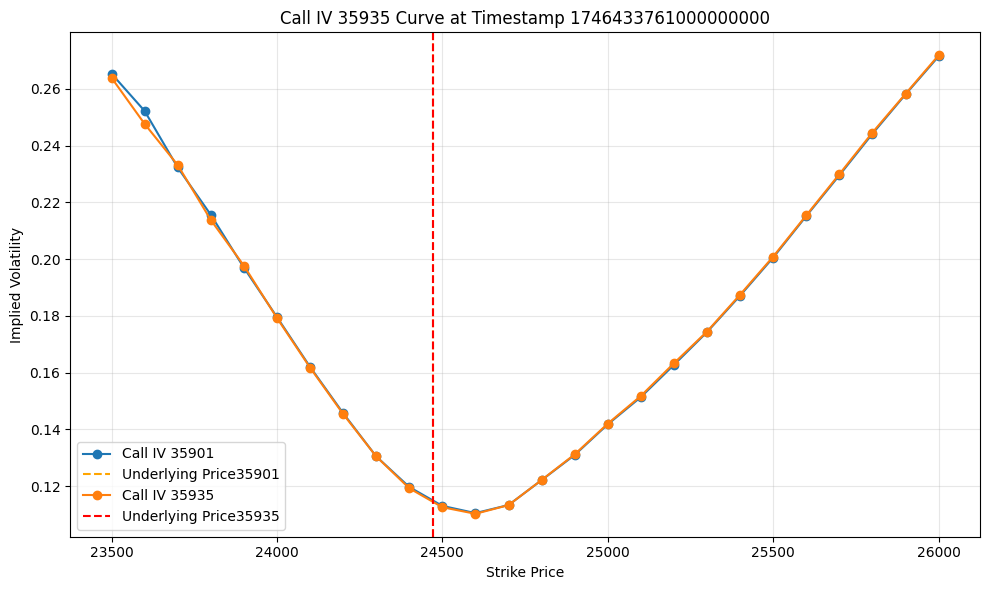

In [27]:
def plot_iv_curve_by_timestamp(timestamps=[0], call_or_put='call', df=week3_df, range1=0, range2=26):
    """
  Plots the implied volatility curve for either call or put options at a specific timestamp.
  
  Parameters:
  - timestamp: The index of the timestamp to plot (default is 0).
  - call_or_put: 'call' for call options, 'put' for put options.
  """
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']
    # Create the plot
    plt.figure(figsize=(10, 6))
    for timestamp in timestamps:
        # Select the specific timestamp
        single_time_df = df[df['timestamp'] == df['timestamp'].iloc[timestamp]]

        # Get the relevant IV columns
        if call_or_put == 'call':
            iv_cols = [col for col in call_put_cols if col.startswith('call_iv_')]
            strike_prices = [int(col.split('_')[-1]) for col in iv_cols]
            iv_values = [single_time_df[col].iloc[0] for col in iv_cols]
            label = 'Call IV ' + str(timestamp)
        else:
            iv_cols = [col for col in call_put_cols if col.startswith('put_iv_')]
            strike_prices = [int(col.split('_')[-1]) for col in iv_cols]
            iv_values = [single_time_df[col].iloc[0] for col in iv_cols]
            label = 'Put IV' + str(timestamp)
        underlying_price = single_time_df['underlying'].iloc[0]
        plt.plot(strike_prices[range1:range2], iv_values[range1:range2], marker='o',label=label)
        plt.axvline(x=underlying_price, linestyle='--', label='Underlying Price' + str(timestamp), color=colors[timestamp % len(colors)])
        #draw a vetical line corresponding to underlying price
    # Add grid, labels and legend
    plt.title(f'{label} Curve at Timestamp {single_time_df["timestamp"].iloc[0]}')
    plt.xlabel('Strike Price')
    plt.ylabel('Implied Volatility')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_iv_curve_by_timestamp(
    timestamps=[35901,35935], call_or_put="call", df=week3_df, range1=0, range2=26
)

In [28]:
# Count rows without NaN values in test_df
non_na_rows = test_df.dropna().shape[0]
total_rows = test_df.shape[0]
percentage = (non_na_rows / total_rows) * 100

print(f"Number of rows without any NaN values: {non_na_rows}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of rows without NaN values: {percentage:.2f}%")

# Alternative calculation by checking each row
rows_without_nans = test_df[~test_df.isna().any(axis=1)].shape[0]
print(f"Verification - rows without NaNs: {rows_without_nans}")

Number of rows without any NaN values: 12065
Total number of rows: 12065
Percentage of rows without NaN values: 100.00%
Verification - rows without NaNs: 12065


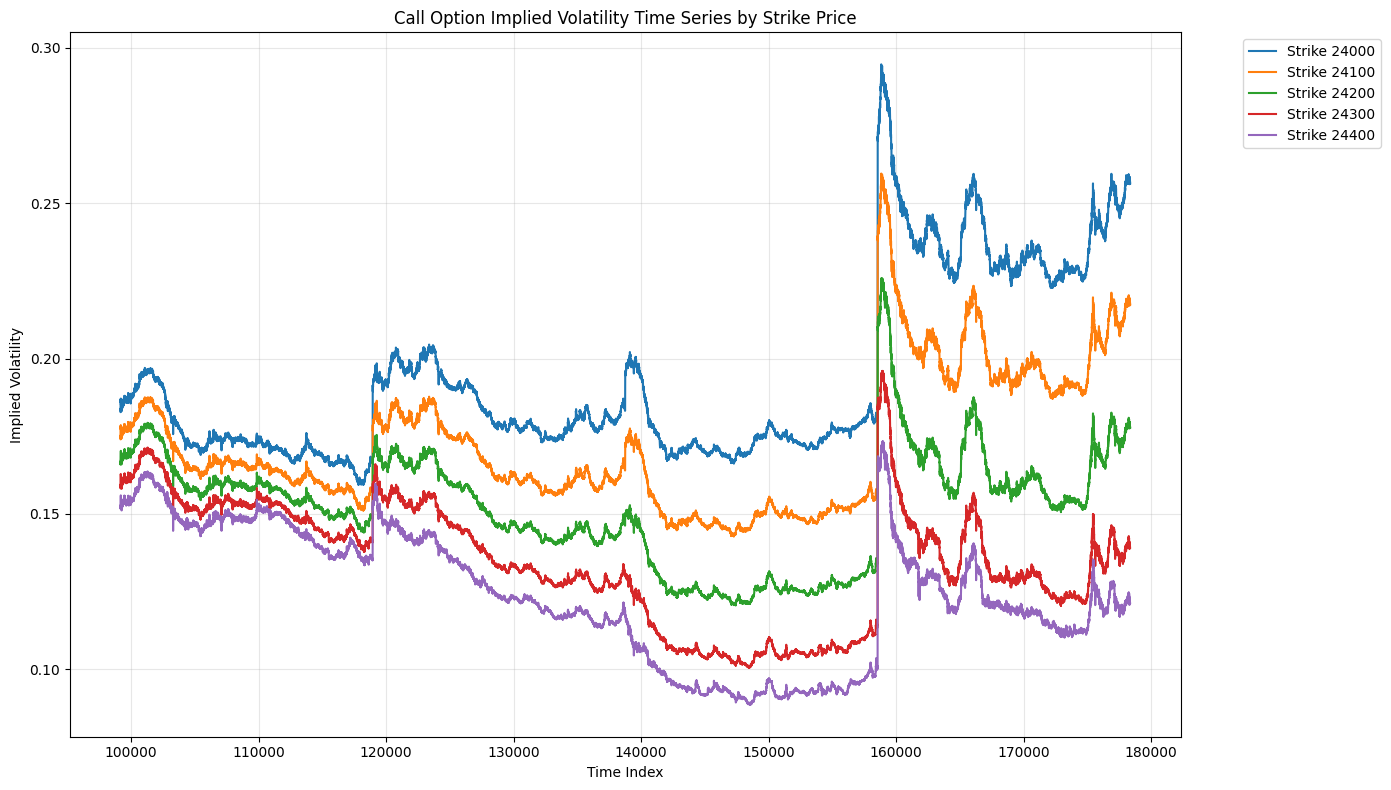

In [29]:
# Extract call IV columns
call_cols = [col for col in week3_df.columns if col.startswith('put_iv_')]

# Create figure
plt.figure(figsize=(14, 8))

# Plot time series for each call strike
for col in call_cols[15:20]:
  strike = col.split('_')[-1]
  plt.plot(week3_df.index, week3_df[col], label=f'Strike {strike}')

plt.title('Call Option Implied Volatility Time Series by Strike Price')
plt.xlabel('Time Index')
plt.ylabel('Implied Volatility')
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

timestamp        0
underlying       0
call_iv_24000    0
call_iv_24100    0
call_iv_24200    0
                ..
X37              0
X38              0
X39              0
X40              0
X41              0
Length: 96, dtype: int64


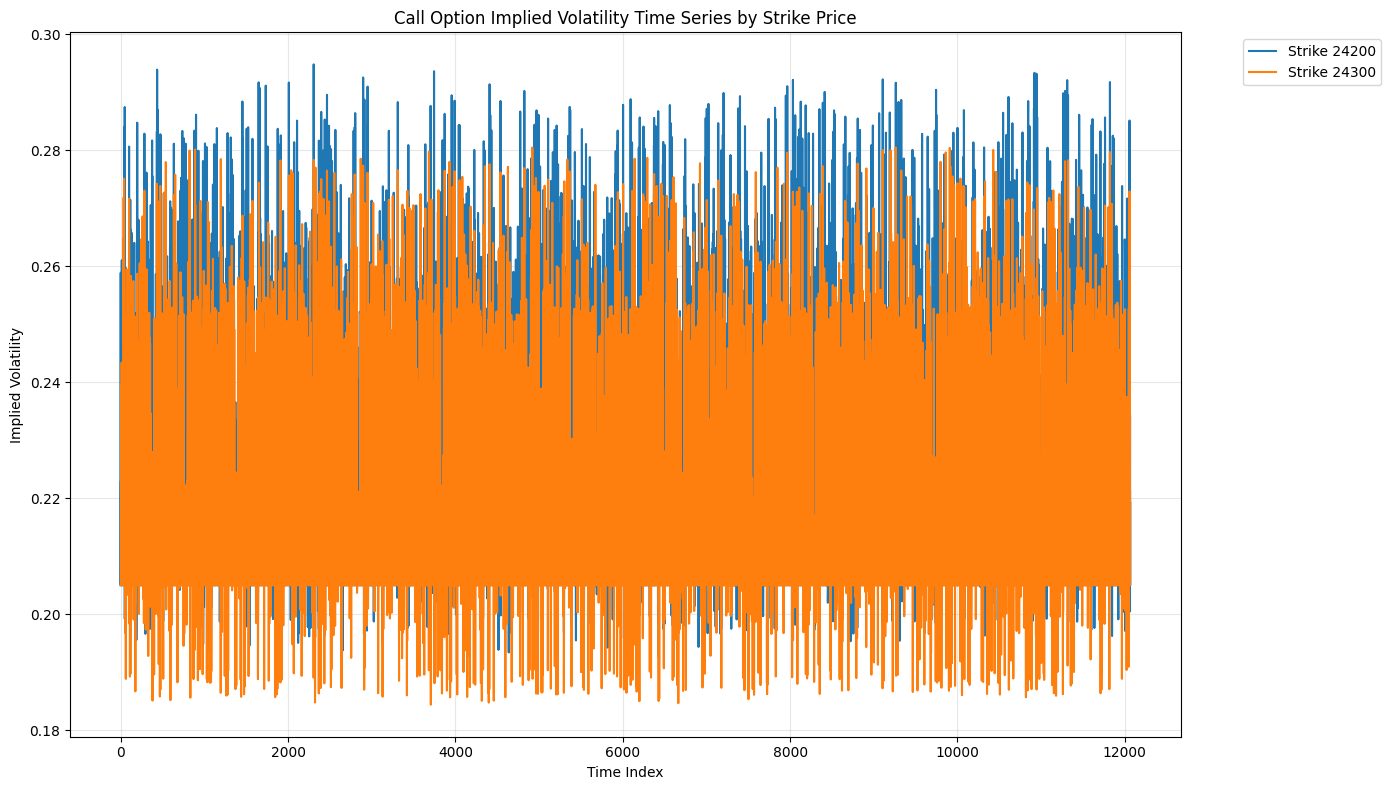

In [30]:
test_df_median = test_df.copy()
# median = train_df[cols].median()
# print(median)
call_cols = [col for col in test_df_median.columns if col.startswith("call_iv_")]
for col in call_cols:
    test_df_col = test_df_median[col].copy()
    test_df_col.dropna(inplace=True)
    median = test_df_col.median()
    # print(median)
    test_df_median[col] = test_df_median[col].fillna(median)

print(test_df_median.isna().sum())
# Create figure
plt.figure(figsize=(14, 8))

# Plot time series for each call strike
for col in call_cols[2:4]:
    strike = col.split("_")[-1]
    plt.plot(test_df.index, test_df[col], label=f"Strike {strike}")

plt.title("Call Option Implied Volatility Time Series by Strike Price")
plt.xlabel("Time Index")
plt.ylabel("Implied Volatility")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [31]:
test_call_put_cols = list(
    filter(
        lambda x: x.startswith("call") or x.startswith("put"), test_df.columns.tolist()
    )
)
len(test_call_put_cols)

52

In [32]:
# Count rows where all call and put columns are NaN
all_nan_rows = test_df[test_call_put_cols].isna().all(axis=1).sum()
print(f"Number of rows where all call/put columns are NaN: {all_nan_rows}")

# Calculate percentage of total
percentage = (all_nan_rows / len(test_df)) * 100
print(f"Percentage of total rows: {percentage:.2f}%")

# Optionally, show a few examples of these rows
if all_nan_rows > 0:
  print("\nSample of rows with all NaN call/put columns:")
  sample_rows = test_df[test_df[test_call_put_cols].isna().all(axis=1)].head(3)
  display(sample_rows[['timestamp', 'underlying'] + test_extra_cols[:5]])

Number of rows where all call/put columns are NaN: 0
Percentage of total rows: 0.00%


Min NaNs: 0
Max NaNs: 0
Mean NaNs: 0.00
Median NaNs: 0.0
Percentage of rows with no NaNs: 100.00%


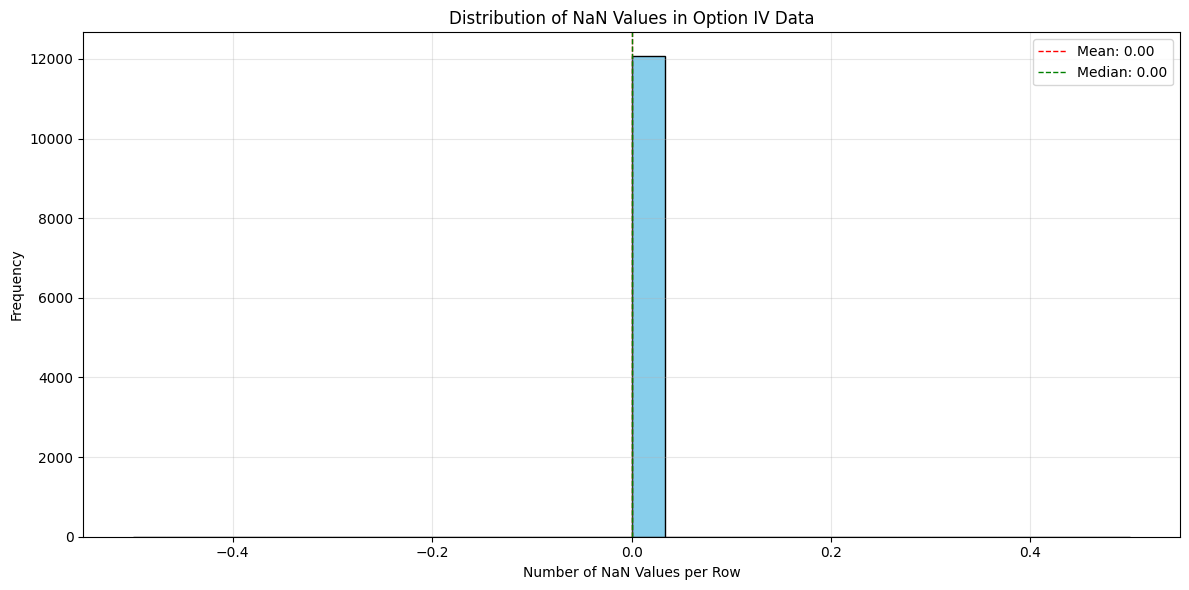

In [33]:
# Create a heatmap of NaN values over time
# First, create a series that counts the number of NaNs in each row
nan_counts = test_df[test_call_put_cols].isna().sum(axis=1)

# Plot the distribution of NaN counts
plt.figure(figsize=(12, 6))
plt.hist(nan_counts, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution of NaN Values in Option IV Data")
plt.xlabel("Number of NaN Values per Row")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)

# Add some statistics
plt.axvline(
    nan_counts.mean(),
    color="red",
    linestyle="dashed",
    linewidth=1,
    label=f"Mean: {nan_counts.mean():.2f}",
)
plt.axvline(
    nan_counts.median(),
    color="green",
    linestyle="dashed",
    linewidth=1,
    label=f"Median: {nan_counts.median():.2f}",
)

# Print summary statistics
print(f"Min NaNs: {nan_counts.min()}")
print(f"Max NaNs: {nan_counts.max()}")
print(f"Mean NaNs: {nan_counts.mean():.2f}")
print(f"Median NaNs: {nan_counts.median()}")
print(f"Percentage of rows with no NaNs: {100 * (nan_counts == 0).mean():.2f}%")

plt.legend()
plt.tight_layout()
plt.show()

In [34]:
# filtered_df = pd.read_csv("tmp/filtered_data.csv")

# # Define the columns to include in correlation analysis
# cols_to_include = ["call_iv_25000", "put_iv_25000", "call_iv_24000", "put_iv_24000"]
# weeks = {
#     "2025-04-24":0,
#     "2025-04-30":1,
#     "2025-05-08":2,
# }
# # Add all columns that don't start with 'call' or 'put'
# for col in filtered_df.columns:
#     if not (col.startswith('call') or col.startswith('put')) or col in cols_to_include:
#         cols_to_include.append(col)
# # Remove duplicates while preserving order
# filtered_df.expiry = filtered_df.expiry.astype(str)
# filtered_df.expiry= filtered_df.expiry.map(weeks)
# print(filtered_df['expiry'].unique())
# cols_to_include = list(dict.fromkeys(cols_to_include))

# # Create correlation matrix
# correlation_matrix = filtered_df[cols_to_include].corr()

# # Plot the correlation matrix as a heatmap
# plt.figure(figsize=(18, 16))
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# sns.heatmap(correlation_matrix, 
#       mask=mask,
#       cmap='coolwarm', 
#       vmin=-1, 
#       vmax=1, 
#       center=0,
#       annot=False, 
#       square=True, 
#       linewidths=.5)
# plt.title('Correlation Matrix', fontsize=16)
# plt.tight_layout()
# plt.show()

# # Also display the specific correlations with call_iv_25000 and put_iv_25000
# call_corr = correlation_matrix['call_iv_25000'].sort_values(ascending=False)
# put_corr = correlation_matrix['put_iv_25000'].sort_values(ascending=False)

# print("Top 10 correlations with call_iv_25000:")
# print(call_corr.head(10))
# print("\nBottom 10 correlations with call_iv_25000:")
# print(call_corr.tail(10))

# print("\nTop 10 correlations with put_iv_25000:")
# print(put_corr.head(10))
# print("\nBottom 10 correlations with put_iv_25000:")
# print(put_corr.tail(10))

[nan, nan, 0.230511, 0.214605, 0.208487, nan, nan, 0.18649, 0.181747, nan, nan, 0.175455, nan, nan, 0.180396, nan, nan, 0.193911, 0.199638, 0.205881, nan, 0.219397, nan, nan, 0.250993, nan]
[0.205, 0.205, 0.230511, 0.214605, 0.208487, 0.205, 0.205, 0.18649, 0.181747, 0.205, 0.205, 0.175455, 0.205, 0.205, 0.180396, 0.205, 0.205, 0.193911, 0.199638, 0.205881, 0.205, 0.219397, 0.205, 0.205, 0.250993, 0.205]


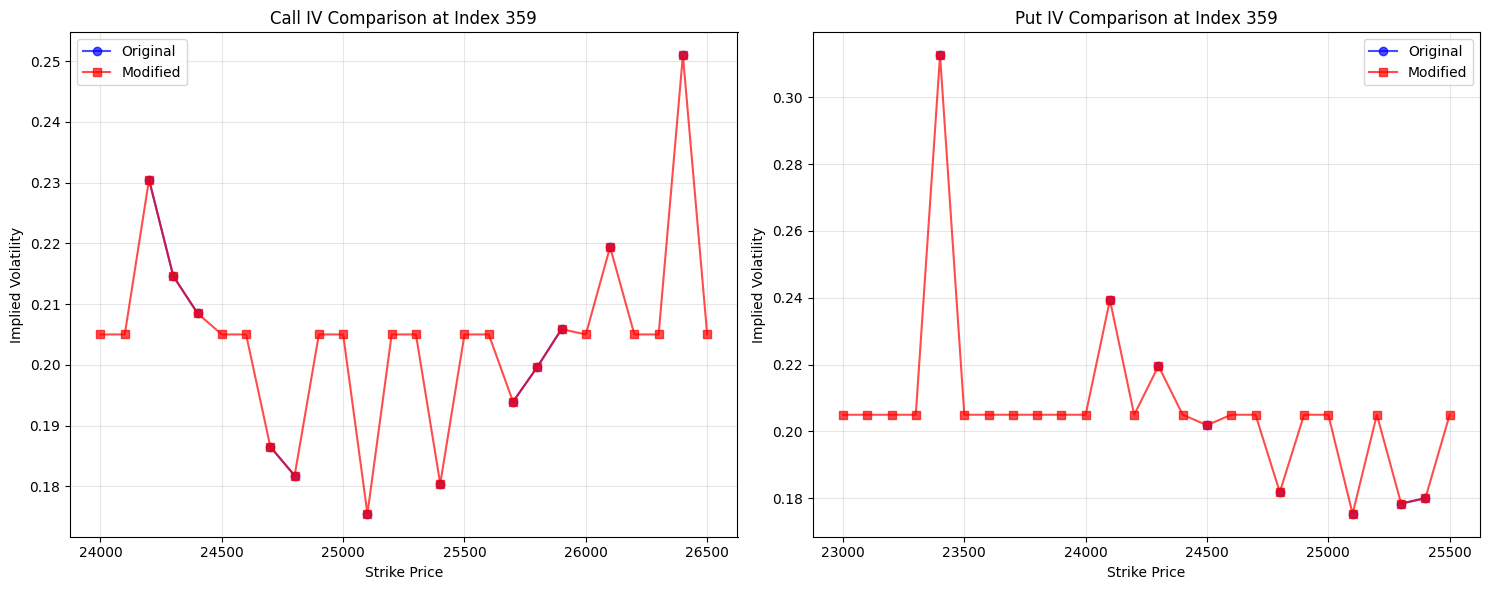


Call IV differences (Modified - Original):
Max difference: nan
Min difference: nan
Mean absolute difference: nan

Put IV differences (Modified - Original):
Max difference: nan
Min difference: nan
Mean absolute difference: nan


In [35]:
# Load the original test data
test_df_original = pd.read_parquet(f'{data_path}/test_data.parquet')

# Select a specific index for comparison
index_to_plot = 359

# Get call and put columns from both dataframes
call_cols_orig = [col for col in test_df_original.columns if col.startswith('call_iv_')]
put_cols_orig = [col for col in test_df_original.columns if col.startswith('put_iv_')]

call_cols_modified = [col for col in test_df.columns if col.startswith('call_iv_')]
put_cols_modified = [col for col in test_df.columns if col.startswith('put_iv_')]

# Extract strike prices
call_strikes = [int(col.split('_')[-1]) for col in call_cols_orig]
put_strikes = [int(col.split('_')[-1]) for col in put_cols_orig]

# Get data for the specific index
call_values_orig = [test_df_original[col].iloc[index_to_plot] for col in call_cols_orig]
put_values_orig = [test_df_original[col].iloc[index_to_plot] for col in put_cols_orig]

call_values_modified = [test_df[col].iloc[index_to_plot] for col in call_cols_modified]
put_values_modified = [test_df[col].iloc[index_to_plot] for col in put_cols_modified]

# Create comparison plots
plt.figure(figsize=(15, 6))

# Plot call options comparison
plt.subplot(1, 2, 1)
plt.plot(call_strikes, call_values_orig, 'o-', color='blue', label='Original', alpha=0.7)
plt.plot(call_strikes, call_values_modified, 's-', color='red', label='Modified', alpha=0.7)
print(call_values_orig)
print(call_values_modified)
plt.title(f'Call IV Comparison at Index {index_to_plot}')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot put options comparison
plt.subplot(1, 2, 2)
plt.plot(put_strikes, put_values_orig, 'o-', color='blue', label='Original', alpha=0.7)
plt.plot(put_strikes, put_values_modified, 's-', color='red', label='Modified', alpha=0.7)
plt.title(f'Put IV Comparison at Index {index_to_plot}')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics about the differences
print(f"\nCall IV differences (Modified - Original):")
call_diffs = [mod - orig for mod, orig in zip(call_values_modified, call_values_orig)]
print(f"Max difference: {max(call_diffs):.6f}")
print(f"Min difference: {min(call_diffs):.6f}")
print(f"Mean absolute difference: {np.mean([abs(d) for d in call_diffs]):.6f}")

print(f"\nPut IV differences (Modified - Original):")
put_diffs = [mod - orig for mod, orig in zip(put_values_modified, put_values_orig)]
print(f"Max difference: {max(put_diffs):.6f}")
print(f"Min difference: {min(put_diffs):.6f}")
print(f"Mean absolute difference: {np.mean([abs(d) for d in put_diffs]):.6f}")

In [36]:
import numpy as np
import pandas as pd
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize
from tqdm import tqdm
from multiprocess import Pool, cpu_count



def process_row(args):

    i, row_data, original_data, strikes_float, call_cols, put_cols = args

    import numpy as np
    import pandas as pd
    from scipy.interpolate import CubicSpline
    from scipy.optimize import minimize
    from tqdm import tqdm
    from multiprocess import Pool, cpu_count


    # ====== 1. Constrained Smoothing Function ======
    def smooth_curve_with_constraints(strikes, ivs_original, ivs_filled):
        mask_real = ~np.isnan(ivs_original)

        if mask_real.sum() < 2:
            return ivs_filled  # Not enough real points to constrain

        def loss(y):
            cs = CubicSpline(strikes, y)
            y_dd = cs(strikes, 2)
            smoothness = np.sum(y_dd**2)
            penalty = np.sum((y[mask_real] - ivs_original[mask_real]) ** 2) * 1e6
            return smoothness + penalty

        result = minimize(loss, ivs_filled.copy(), method="L-BFGS-B")
        return result.x if result.success else ivs_filled

    # -------------------

    row_result = {}


    # Call side

    ivs_filled_call = row_data[call_cols].values.astype(float)

    ivs_original_call = original_data[call_cols].values.astype(float)

    smoothed_call = smooth_curve_with_constraints(

        strikes_float, ivs_original_call, ivs_filled_call
    )

    row_result.update({col: val for col, val in zip(call_cols, smoothed_call)})


    # Put side

    ivs_filled_put = row_data[put_cols].values.astype(float)

    ivs_original_put = original_data[put_cols].values.astype(float)

    smoothed_put = smooth_curve_with_constraints(

        strikes_float, ivs_original_put, ivs_filled_put
    )

    row_result.update({col: val for col, val in zip(put_cols, smoothed_put)})


    return (i, row_result)



# ====== 3. Setup & Execution ======

def apply_constrained_smoothing_parallel(test_df, test_df_original, test_pred_cols):

    # Get strike levels

    strikes = [

        col.split("_")[-1] for col in test_pred_cols if col.startswith("call_iv_")

    ]

    strikes_float = np.array(strikes, dtype=float)


    # Columns to smooth

    call_cols = [col for col in test_pred_cols if col.startswith("call_iv_")]

    put_cols = [col for col in test_pred_cols if col.startswith("put_iv_")]


    # Prepare data and args

    args_list = [
        (
            i,

            test_df.iloc[i],

            test_df_original.iloc[i],

            strikes_float,
            call_cols,
            put_cols,
        )

        for i in range(len(test_df))

    ]


    results = []

    with Pool(cpu_count()) as pool:

        for result in tqdm(

            pool.imap_unordered(process_row, args_list), total=len(args_list)

        ):
            results.append(result)


    # Apply results

    test_df_smoothed = test_df.copy()

    for i, row_result in results:

        for col, val in row_result.items():

            test_df_smoothed.at[i, col] = val


    return test_df_smoothed


# test_df_3 = apply_constrained_smoothing_parallel(test_df, test_df_original, test_pred_cols)

In [37]:
# # Load the original test data
# test_df_original = pd.read_parquet(f"{data_path}/test_data.parquet")

# # Select a specific index for comparison
# index_to_plot = 359

# # Get call and put columns from both dataframes
# call_cols_orig = [col for col in test_df_original.columns if col.startswith("call_iv_")]
# put_cols_orig = [col for col in test_df_original.columns if col.startswith("put_iv_")]

# call_cols_modified = [col for col in test_df.columns if col.startswith("call_iv_")]
# put_cols_modified = [col for col in test_df.columns if col.startswith("put_iv_")]

# # Extract strike prices
# call_strikes = [int(col.split("_")[-1]) for col in call_cols_orig]
# put_strikes = [int(col.split("_")[-1]) for col in put_cols_orig]

# # Get data for the specific index
# call_values_orig = [test_df_original[col].iloc[index_to_plot] for col in call_cols_orig]
# put_values_orig = [test_df_original[col].iloc[index_to_plot] for col in put_cols_orig]

# call_values_modified = [
#     test_df_3[col].iloc[index_to_plot] for col in call_cols_modified
# ]
# put_values_modified = [test_df_3[col].iloc[index_to_plot] for col in put_cols_modified]

# # Create comparison plots
# plt.figure(figsize=(15, 6))

# # Plot call options comparison
# plt.subplot(1, 2, 1)
# plt.plot(
#     call_strikes, call_values_orig, "o-", color="blue", label="Original", alpha=0.7
# )
# plt.plot(
#     call_strikes, call_values_modified, "s-", color="red", label="Modified", alpha=0.7
# )
# print(call_values_orig)
# print(call_values_modified)
# plt.title(f"Call IV Comparison at Index {index_to_plot}")
# plt.xlabel("Strike Price")
# plt.ylabel("Implied Volatility")
# plt.legend()
# plt.grid(True, alpha=0.3)

# # Plot put options comparison
# plt.subplot(1, 2, 2)
# plt.plot(put_strikes, put_values_orig, "o-", color="blue", label="Original", alpha=0.7)
# plt.plot(
#     put_strikes, put_values_modified, "s-", color="red", label="Modified", alpha=0.7
# )
# plt.title(f"Put IV Comparison at Index {index_to_plot}")
# plt.xlabel("Strike Price")
# plt.ylabel("Implied Volatility")
# plt.legend()
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Print some statistics about the differences
# print(f"\nCall IV differences (Modified - Original):")
# call_diffs = [mod - orig for mod, orig in zip(call_values_modified, call_values_orig)]
# print(f"Max difference: {max(call_diffs):.6f}")
# print(f"Min difference: {min(call_diffs):.6f}")
# print(f"Mean absolute difference: {np.mean([abs(d) for d in call_diffs]):.6f}")

# print(f"\nPut IV differences (Modified - Original):")
# put_diffs = [mod - orig for mod, orig in zip(put_values_modified, put_values_orig)]
# print(f"Max difference: {max(put_diffs):.6f}")
# print(f"Min difference: {min(put_diffs):.6f}")
# print(f"Mean absolute difference: {np.mean([abs(d) for d in put_diffs]):.6f}")

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
test_df_2_raw = pca.inverse_transform(
    pca.fit_transform(test_df[test_pred_cols])
)
test_df_2 = test_df.copy()
test_df_2[test_pred_cols] = test_df_2_raw

In [39]:


# For each call and put column, replace values in test_df_2 with non-NaN values from test_df_original
for col in test_pred_cols:
  if col in test_df_original.columns:
    # Get mask of non-NaN values in original data
    non_nan_mask = ~test_df_original[col].isna()
    # Replace corresponding values in test_df_2
    test_df_2.loc[non_nan_mask, col] = test_df_original.loc[non_nan_mask, col]

[nan, nan, 0.230511, 0.214605, 0.208487, nan, nan, 0.18649, 0.181747, nan, nan, 0.175455, nan, nan, 0.180396, nan, nan, 0.193911, 0.199638, 0.205881, nan, 0.219397, nan, nan, 0.250993, nan]
[0.2170441984239891, 0.21534456536123292, 0.230511, 0.214605, 0.208487, 0.1993032602022121, 0.19643692179058556, 0.18649, 0.181747, 0.19102949466445862, 0.19051968230738855, 0.175455, 0.19326045266017255, 0.194060664636335, 0.180396, 0.19849536498853146, 0.20069309984995884, 0.193911, 0.199638, 0.205881, 0.20888455184799934, 0.219397, 0.21798831748133243, 0.2187834149965486, 0.250993, 0.1967104191018438]


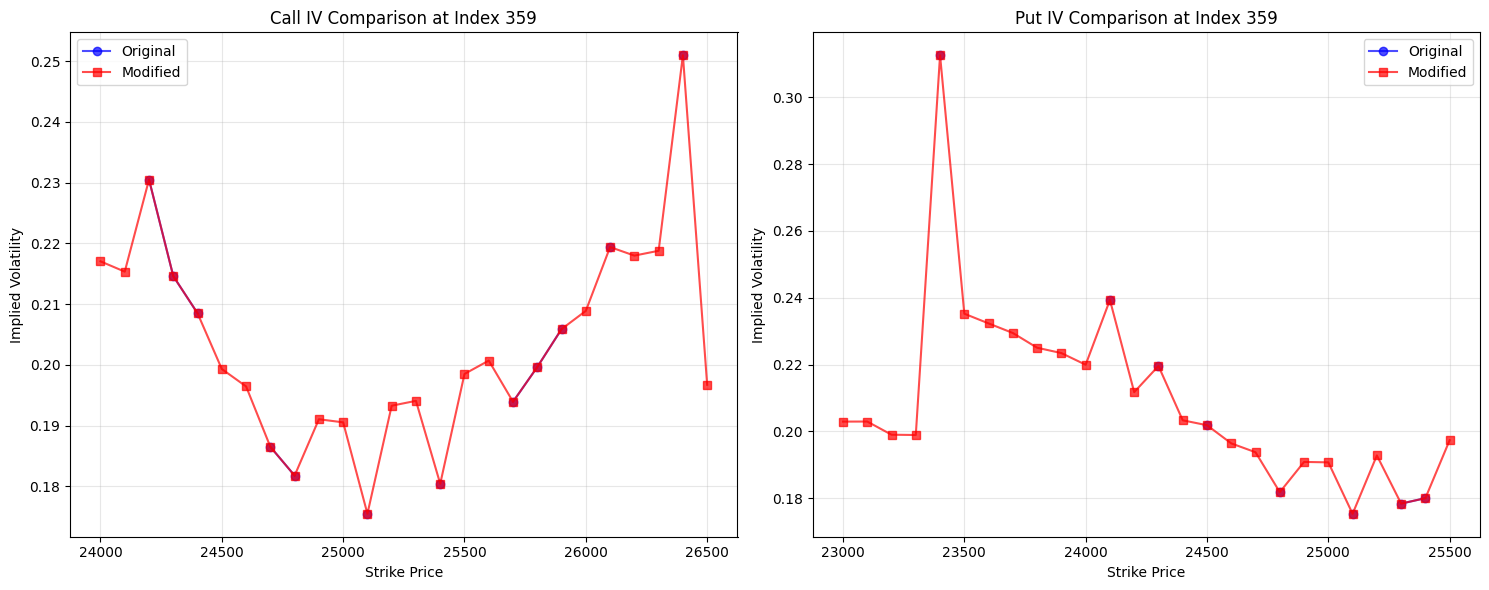


Call IV differences (Modified - Original):
Max difference: nan
Min difference: nan
Mean absolute difference: nan

Put IV differences (Modified - Original):
Max difference: nan
Min difference: nan
Mean absolute difference: nan


In [40]:
# Load the original test data
test_df_original = pd.read_parquet(f"{data_path}/test_data.parquet")

# Select a specific index for comparison
index_to_plot = 359

# Get call and put columns from both dataframes
call_cols_orig = [col for col in test_df_original.columns if col.startswith("call_iv_")]
put_cols_orig = [col for col in test_df_original.columns if col.startswith("put_iv_")]

call_cols_modified = [col for col in test_df.columns if col.startswith("call_iv_")]
put_cols_modified = [col for col in test_df.columns if col.startswith("put_iv_")]

# Extract strike prices
call_strikes = [int(col.split("_")[-1]) for col in call_cols_orig]
put_strikes = [int(col.split("_")[-1]) for col in put_cols_orig]

# Get data for the specific index
call_values_orig = [test_df_original[col].iloc[index_to_plot] for col in call_cols_orig]
put_values_orig = [test_df_original[col].iloc[index_to_plot] for col in put_cols_orig]

call_values_modified = [test_df_2[col].iloc[index_to_plot] for col in call_cols_modified]
put_values_modified = [test_df_2[col].iloc[index_to_plot] for col in put_cols_modified]

# Create comparison plots
plt.figure(figsize=(15, 6))

# Plot call options comparison
plt.subplot(1, 2, 1)
plt.plot(
    call_strikes, call_values_orig, "o-", color="blue", label="Original", alpha=0.7
)
plt.plot(
    call_strikes, call_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
print(call_values_orig)
print(call_values_modified)
plt.title(f"Call IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot put options comparison
plt.subplot(1, 2, 2)
plt.plot(put_strikes, put_values_orig, "o-", color="blue", label="Original", alpha=0.7)
plt.plot(
    put_strikes, put_values_modified, "s-", color="red", label="Modified", alpha=0.7
)
plt.title(f"Put IV Comparison at Index {index_to_plot}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics about the differences
print(f"\nCall IV differences (Modified - Original):")
call_diffs = [mod - orig for mod, orig in zip(call_values_modified, call_values_orig)]
print(f"Max difference: {max(call_diffs):.6f}")
print(f"Min difference: {min(call_diffs):.6f}")
print(f"Mean absolute difference: {np.mean([abs(d) for d in call_diffs]):.6f}")

print(f"\nPut IV differences (Modified - Original):")
put_diffs = [mod - orig for mod, orig in zip(put_values_modified, put_values_orig)]
print(f"Max difference: {max(put_diffs):.6f}")
print(f"Min difference: {min(put_diffs):.6f}")
print(f"Mean absolute difference: {np.mean([abs(d) for d in put_diffs]):.6f}")

In [41]:
test_2_sub= test_df_2[submission_cols]
test_2_sub.to_csv(f"output/pca_smoothing.csv", index=False)
test_2_sub

,timestamp,call_iv_24000,call_iv_24100,call_iv_24200,call_iv_24300,call_iv_24400,call_iv_24500,call_iv_24600,call_iv_24700,call_iv_24800,...,put_iv_24600,put_iv_24700,put_iv_24800,put_iv_24900,put_iv_25000,put_iv_25100,put_iv_25200,put_iv_25300,put_iv_25400,put_iv_25500
0,0,0.280939,0.225547,0.221513,0.217667,0.242149,0.210678,0.232439,0.205921,0.222997,...,0.232334,0.205897,0.204752,0.227301,0.234169,0.212035,0.250422,0.218416,0.220270,0.282229
1,1,0.270276,0.229450,0.258893,0.221185,0.216849,0.214320,0.233548,0.208855,0.207695,...,0.211152,0.228209,0.207553,0.207822,0.211006,0.249402,0.216127,0.218213,0.221124,0.224806
2,2,0.221305,0.251731,0.216033,0.211567,0.214869,0.204580,0.194604,0.197375,0.196227,...,0.194612,0.188052,0.196253,0.195914,0.181346,0.197079,0.190750,0.202049,0.202674,0.206805
3,3,0.241888,0.220268,0.220505,0.212361,0.198602,0.186190,0.202221,0.199573,0.198197,...,0.202214,0.166394,0.161561,0.197862,0.198840,0.172032,0.202724,0.204744,0.206171,0.206107
4,4,0.235328,0.215473,0.222983,0.214126,0.203638,0.199975,0.192603,0.194344,0.193016,...,0.197017,0.194305,0.192752,0.177920,0.191580,0.176000,0.194256,0.195578,0.182314,0.199781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12060,12060,0.221189,0.233427,0.214098,0.210426,0.207177,0.202787,0.200371,0.186856,0.195992,...,0.200131,0.197239,0.195814,0.177270,0.195365,0.196152,0.176356,0.177716,0.200903,0.202900
12061,12061,0.214299,0.236380,0.226972,0.204342,0.200439,0.200906,0.193655,0.191030,0.189705,...,0.193589,0.191023,0.189458,0.180196,0.177969,0.177923,0.189223,0.180254,0.192617,0.194507
12062,12062,0.256475,0.243817,0.234267,0.221270,0.208428,0.205280,0.201941,0.185088,0.179760,...,0.192306,0.199720,0.179666,0.176916,0.199348,0.201395,0.202779,0.204672,0.201360,0.209940
12063,12063,0.223564,0.239825,0.216619,0.213252,0.209338,0.204807,0.202687,0.190833,0.185851,...,0.202271,0.190933,0.186172,0.196961,0.197164,0.197467,0.199369,0.178806,0.201867,0.203906


In [42]:
test_df[test_df['put_iv_25500']==0].shape

(0, 96)

In [43]:
test_df_original.isna().sum().sum()

376504

In [44]:
test_df.isna().sum().sum()

0

In [45]:
test_pred_cols = list(
    filter(
        lambda x: x.startswith("call") or x.startswith("put"), test_df.columns.tolist()
    )
)

In [46]:
train_call = [col for col in train_df.columns if col.startswith("call_iv_") ]
train_put = [col for col in train_df.columns if col.startswith("put_iv_") ]



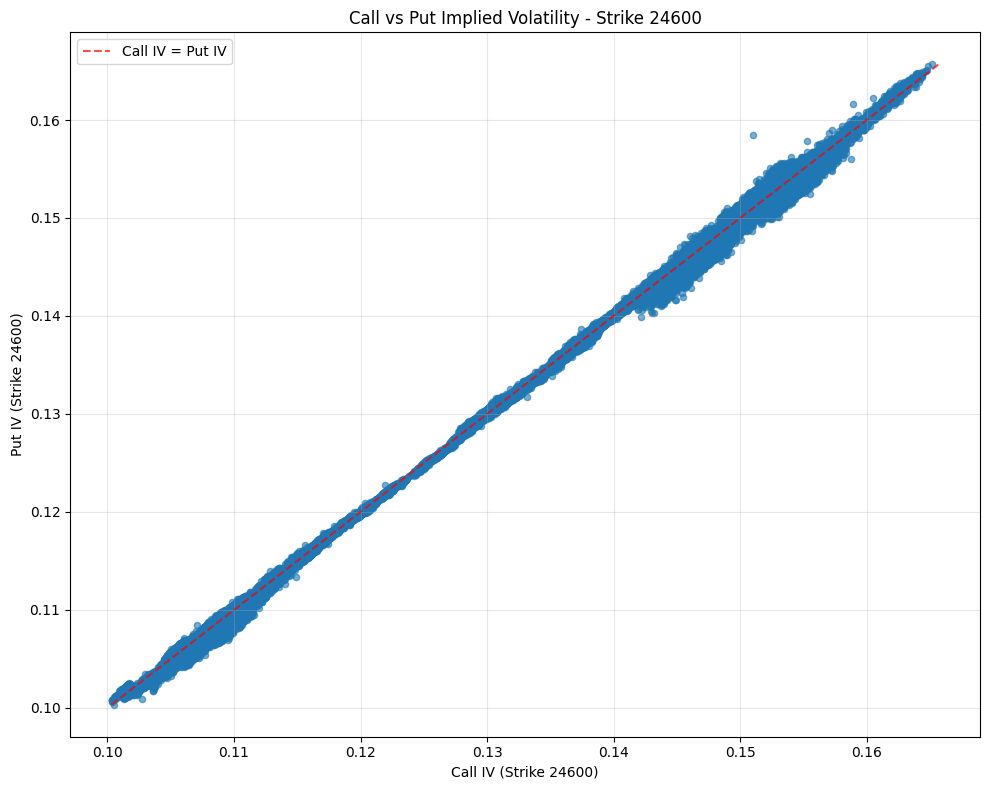

In [47]:
# Select a specific strike price (e.g., 24500)
strike = 24600
call_col = f'call_iv_{strike}'
put_col = f'put_iv_{strike}'

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(week3_df[call_col], week3_df[put_col], alpha=0.6, s=20)
plt.xlabel(f'Call IV (Strike {strike})')
plt.ylabel(f'Put IV (Strike {strike})')
plt.title(f'Call vs Put Implied Volatility - Strike {strike}')
plt.grid(True, alpha=0.3)

# Add diagonal line for reference (call IV = put IV)
min_iv = min(week3_df[call_col].min(), week3_df[put_col].min())
max_iv = max(week3_df[call_col].max(), week3_df[put_col].max())
plt.plot([min_iv, max_iv], [min_iv, max_iv], 'r--', alpha=0.7, label='Call IV = Put IV')
plt.legend()
plt.tight_layout()
plt.show()

Number of non-NaN data points: 1908
Total data points: 12065
Percentage of non-NaN data: 15.81%


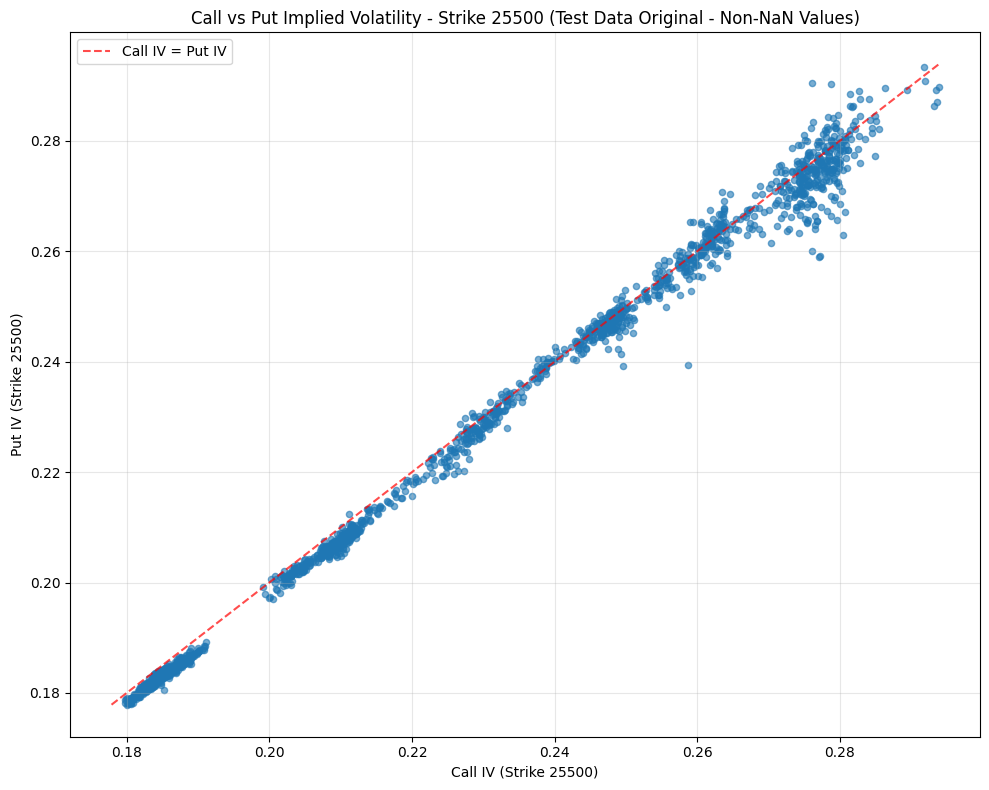

In [48]:
# Get the call and put columns from test_df_original
test_call_cols = [col for col in test_df_original.columns if col.startswith('call_iv_')]
test_put_cols = [col for col in test_df_original.columns if col.startswith('put_iv_')]

# Select a specific strike price (e.g., 24600)
strike = 25500
call_col = f'call_iv_{strike}'
put_col = f'put_iv_{strike}'

# Filter out NaN values for both call and put columns
mask = ~(test_df_original[call_col].isna() | test_df_original[put_col].isna())
filtered_call = test_df_original[call_col][mask]
filtered_put = test_df_original[put_col][mask]

# Create scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(filtered_call, filtered_put, alpha=0.6, s=20)
plt.xlabel(f'Call IV (Strike {strike})')
plt.ylabel(f'Put IV (Strike {strike})')
plt.title(f'Call vs Put Implied Volatility - Strike {strike} (Test Data Original - Non-NaN Values)')
plt.grid(True, alpha=0.3)

# Add diagonal line for reference (call IV = put IV)
min_iv = min(filtered_call.min(), filtered_put.min())
max_iv = max(filtered_call.max(), filtered_put.max())
plt.plot([min_iv, max_iv], [min_iv, max_iv], 'r--', alpha=0.7, label='Call IV = Put IV')
plt.legend()

# Add statistics
print(f"Number of non-NaN data points: {len(filtered_call)}")
print(f"Total data points: {len(test_df_original)}")
print(f"Percentage of non-NaN data: {100 * len(filtered_call) / len(test_df_original):.2f}%")

plt.tight_layout()
plt.show()

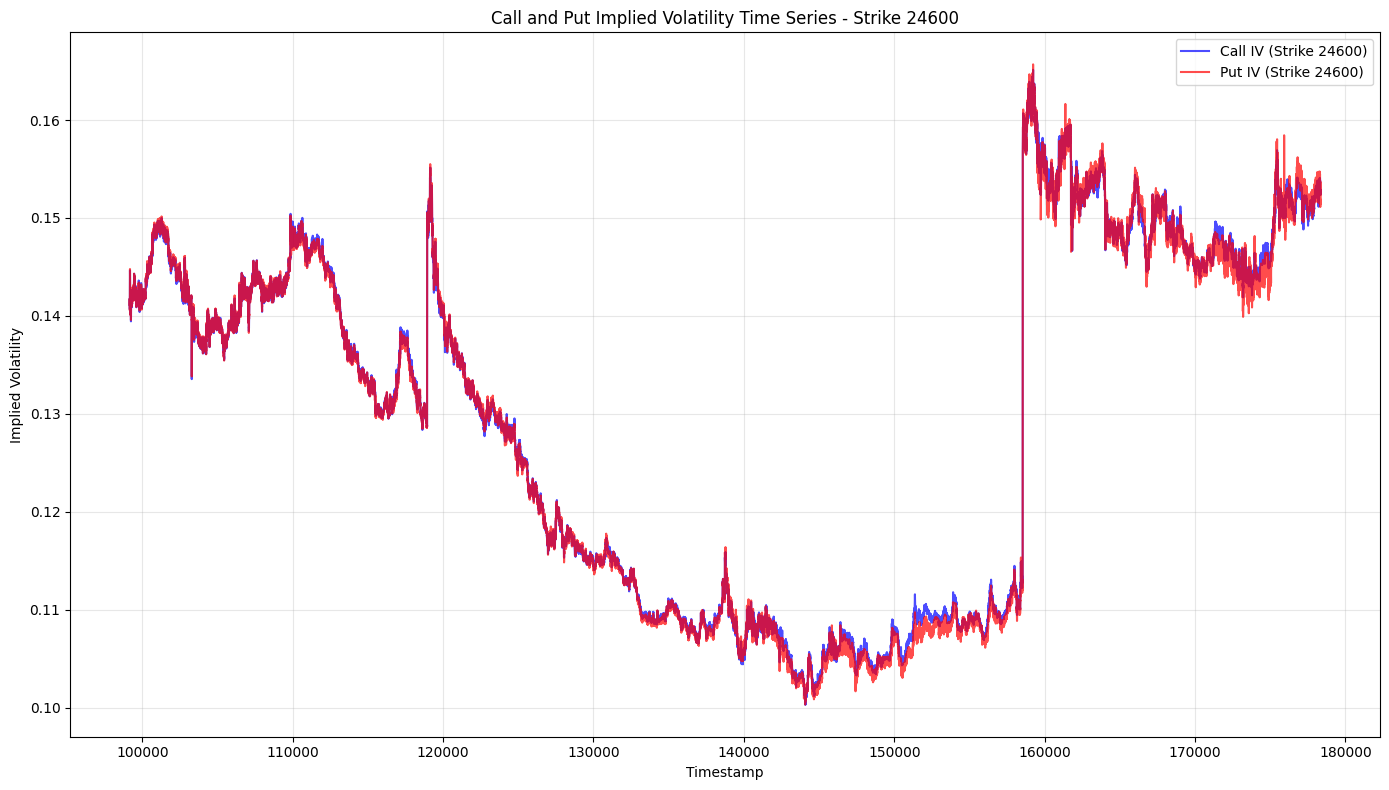

In [49]:
# Select a specific strike price for comparison
strike = 24600
call_col = f'call_iv_{strike}'
put_col = f'put_iv_{strike}'

# Create the plot
plt.figure(figsize=(14, 8))

# Plot call IV time series
plt.plot(week3_df.index, week3_df[call_col], label=f'Call IV (Strike {strike})', color='blue', alpha=0.7)
# Plot put IV time series  
plt.plot(week3_df.index, week3_df[put_col], label=f'Put IV (Strike {strike})', color='red', alpha=0.7)

plt.title(f'Call and Put Implied Volatility Time Series - Strike {strike}')
plt.xlabel('Timestamp')
plt.ylabel('Implied Volatility')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [50]:
week3_df[week3_df.timestamp < 10]

,timestamp,underlying,expiry,call_iv_23500,call_iv_23600,call_iv_23700,call_iv_23800,call_iv_23900,call_iv_24000,call_iv_24100,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41


In [51]:
call_put_cols = [col for col in train_df.columns if col.startswith('call_iv_') or col.startswith('put_iv_')]
feature_cols = [
    col
    for col in train_df.columns
    if col not in call_put_cols and col not in ["timestamp", "expiry"]
]

In [52]:
week3_df[feature_cols]

,underlying,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
99163,24500.4,0.055019,0.025658,0.000000,-0.013302,-6.927975e+06,0.004484,0.021432,0.312514,-1.700447e+06,...,0.025330,0.001951,659507.812500,0.002091,0.042888,0.224168,-8.267099e+06,1.291266e+06,-0.000000,1.661422e+06
99164,24500.3,0.423684,0.206257,0.000000,0.007947,1.271703e+06,0.228721,0.022322,0.126104,-1.910448e+06,...,0.019196,-0.003928,0.000000,0.107505,0.338139,-0.008013,-4.001948e+04,5.437667e+06,-0.000000,8.989981e+05
99165,24500.3,0.318032,0.263912,0.000000,0.003559,6.707933e+06,0.294433,0.115703,0.104421,-1.678692e+06,...,0.052586,0.014589,0.000000,0.215905,0.337658,0.045038,1.444871e+05,5.327053e+06,-0.000000,1.380197e+06
99166,24500.5,-0.291699,-0.036735,0.000000,-0.001069,9.020367e+06,-0.028524,-0.008641,-0.383668,-1.908150e+06,...,-0.011408,-0.003651,0.000000,-0.014058,-0.284916,-0.089235,-1.524367e+06,8.751108e+06,-0.000000,-1.000000e-06
99167,24500.5,0.203000,-0.051342,-230348.958333,-0.007405,2.661637e+06,-0.041973,0.024829,0.164424,-2.141327e+06,...,-0.013692,-0.018104,-230348.958333,-0.007395,0.275667,0.019951,-1.019946e+07,-6.611615e+06,-230348.958333,1.447273e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178335,24358.8,-0.226467,-0.011456,0.000000,0.001979,2.322461e+06,-0.000943,-0.006141,0.010494,-6.351417e+05,...,-0.011905,0.000325,-354025.390625,0.050895,-1.121442,0.023504,-1.878804e+05,2.530094e+06,-0.000000,0.000000e+00
178336,24359.6,-0.148357,0.062989,0.000000,0.000580,3.229624e+06,0.067154,0.000647,0.096005,-6.335190e+05,...,0.028344,-0.002219,-208171.875000,0.011957,-1.066485,0.017385,1.055536e+06,1.794233e+06,-0.000000,0.000000e+00
178337,24358.5,-0.190833,-0.160079,0.000000,0.001718,2.162806e+06,-0.119378,0.007482,0.009544,-4.287883e+05,...,-0.034540,0.006087,-207898.437500,-0.041227,-1.147740,0.111446,-5.074557e+05,-6.639723e+05,-0.000000,0.000000e+00
178338,24358.5,-0.615292,-0.194071,-244659.375000,0.000750,-3.295170e+06,-0.008974,-0.018477,-0.012348,-6.839939e+05,...,-0.023918,-0.013291,-452056.696429,-0.035861,-1.680071,0.188765,8.729859e+05,-5.955741e+06,-244659.375000,0.000000e+00
